In [7]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
df = pd.read_csv('data/surveys_complete.csv')
df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,63,8,19,1977,3.0,DM,M,35.0,40.0
1,64,8,19,1977,7.0,DM,M,37.0,48.0
2,65,8,19,1977,4.0,DM,F,34.0,29.0
3,66,8,19,1977,4.0,DM,F,35.0,46.0
4,67,8,19,1977,7.0,DM,M,35.0,36.0
...,...,...,...,...,...,...,...,...,...
30671,35541,12,31,2002,15.0,PB,F,24.0,31.0
30672,35542,12,31,2002,15.0,PB,F,26.0,29.0
30673,35543,12,31,2002,15.0,PB,F,27.0,34.0
30674,35547,12,31,2002,10.0,RM,F,15.0,14.0


<AxesSubplot:xlabel='year', ylabel='count'>

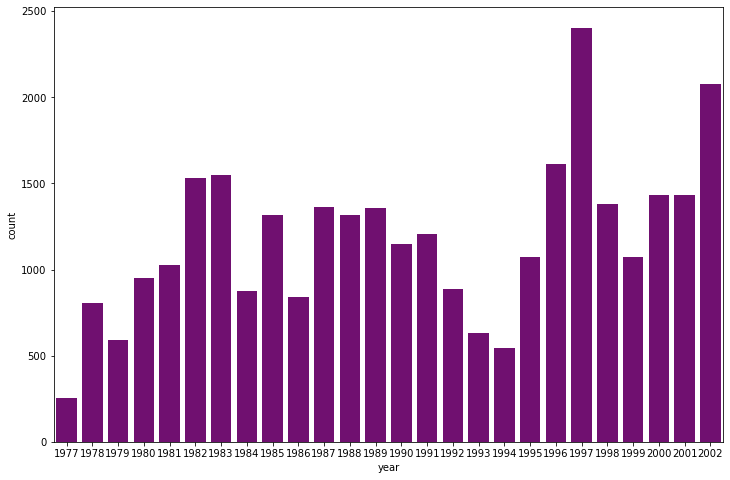

In [9]:
sns.countplot(x = df['year'], color = 'purple')

<AxesSubplot:xlabel='hindfoot_length', ylabel='Count'>

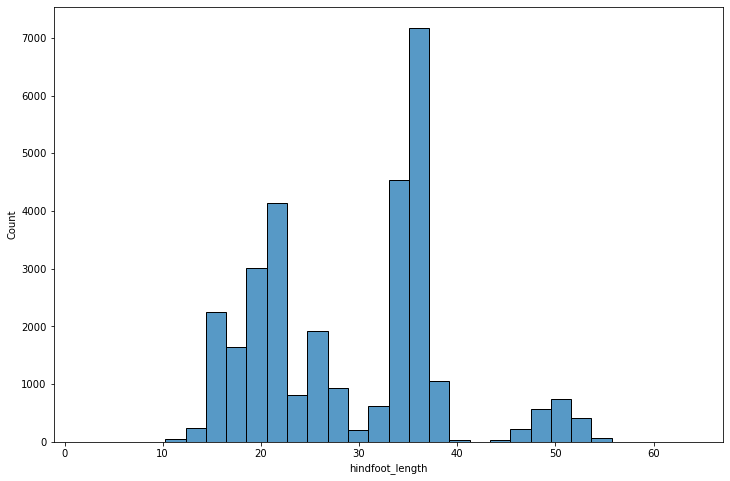

In [12]:
sns.histplot(df['hindfoot_length'], bins = 30)

<AxesSubplot:xlabel='species_id', ylabel='hindfoot_length'>

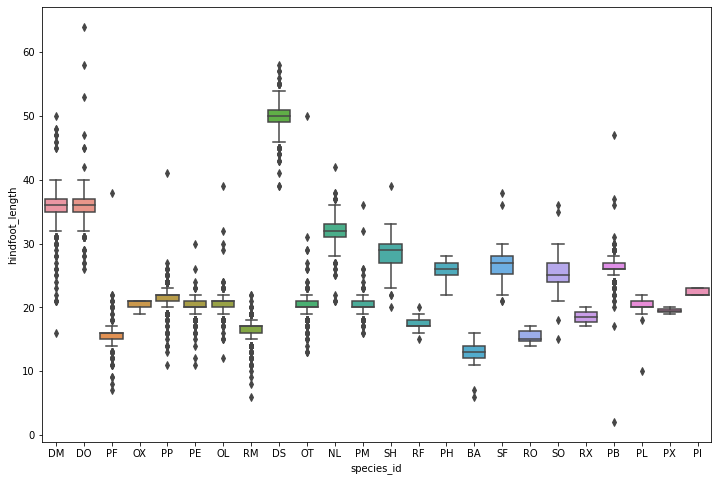

In [13]:
sns.boxplot(x = 'species_id', y = 'hindfoot_length', data = df)

<AxesSubplot:xlabel='species_id', ylabel='hindfoot_length'>

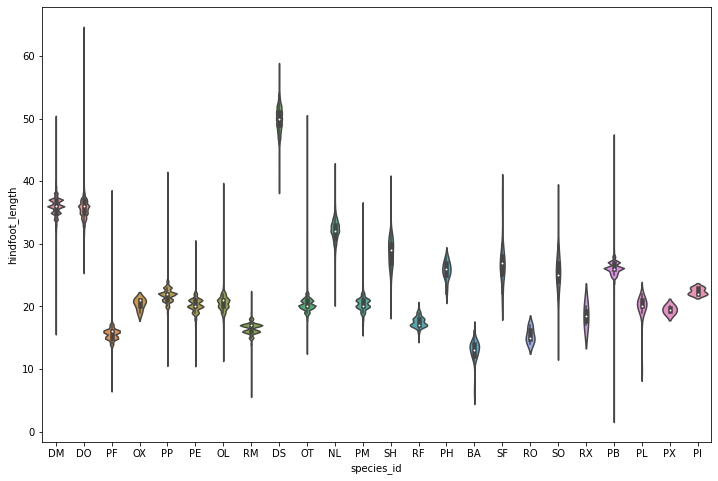

In [14]:
sns.violinplot(x = 'species_id', y = 'hindfoot_length', data = df)

In [19]:
top_five = df['species_id'].value_counts()[:5].keys()

In [20]:
tf_df = df[df['species_id'].isin(top_five)]
tf_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,63,8,19,1977,3.0,DM,M,35.0,40.0
1,64,8,19,1977,7.0,DM,M,37.0,48.0
2,65,8,19,1977,4.0,DM,F,34.0,29.0
3,66,8,19,1977,4.0,DM,F,35.0,46.0
4,67,8,19,1977,7.0,DM,M,35.0,36.0
...,...,...,...,...,...,...,...,...,...
30671,35541,12,31,2002,15.0,PB,F,24.0,31.0
30672,35542,12,31,2002,15.0,PB,F,26.0,29.0
30673,35543,12,31,2002,15.0,PB,F,27.0,34.0
30674,35547,12,31,2002,10.0,RM,F,15.0,14.0


<AxesSubplot:xlabel='species_id', ylabel='hindfoot_length'>

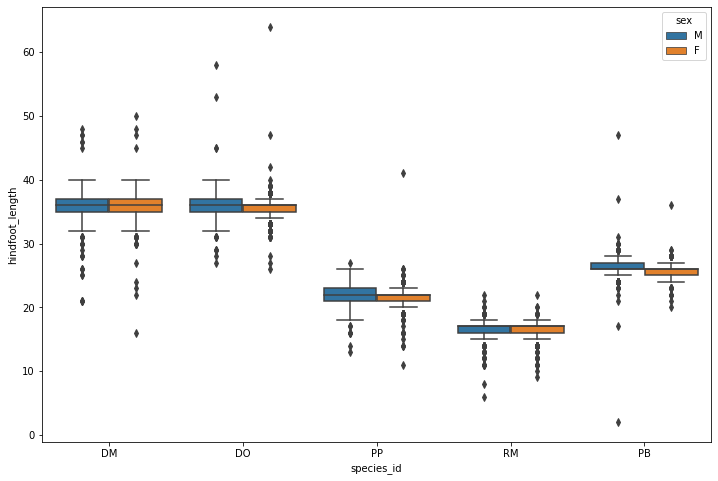

In [21]:
sns.boxplot(x = 'species_id', y = 'hindfoot_length', hue = 'sex', data = tf_df)

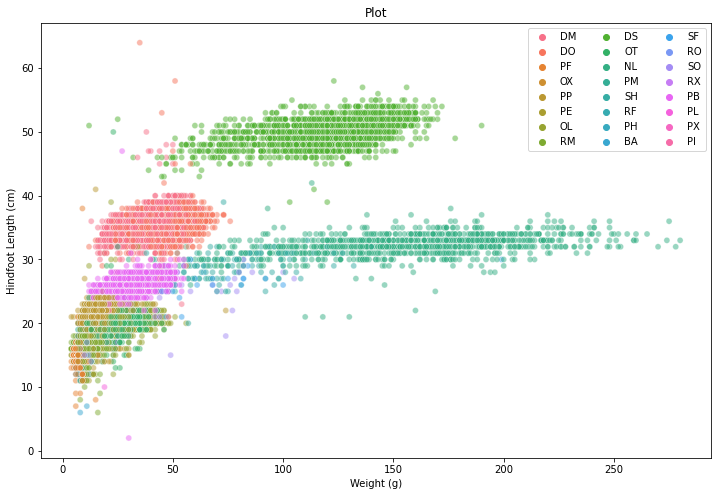

In [26]:
sns.scatterplot(x = 'weight', y = 'hindfoot_length', hue = 'species_id', data = df, alpha = 0.5)

plt.legend(ncol = 3)
plt.xlabel('Weight (g)')
plt.ylabel('Hindfoot Length (cm)')
plt.title('Plot')

plt.savefig('figures/my_saved_plot.png')

In [34]:
sc_df = df.groupby(['plot_id', 'species_id'], as_index = False)['record_id'].count()

In [36]:
sc_df.rename(columns = {'record_id':'indiv_count'}, inplace = True)

<AxesSubplot:xlabel='plot_id', ylabel='indiv_count'>

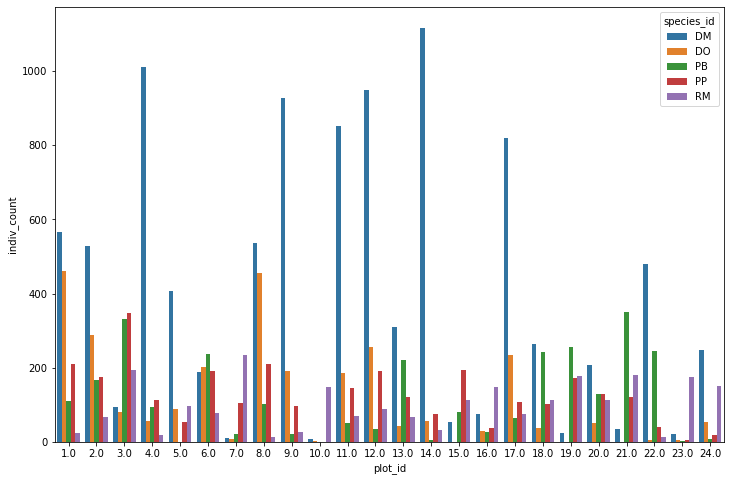

In [40]:
to_plot_df = sc_df[sc_df['species_id'].isin(top_five)]

sns.barplot(x = 'plot_id', y = 'indiv_count', hue = 'species_id', data = to_plot_df)